In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame(pd.read_csv('Stores_Transactions.csv'))

In [3]:
import warnings
warnings.simplefilter(action='ignore')
plt.style.use('seaborn')

In [4]:
import jdatetime

In [5]:
import seaborn as sns

In [6]:
from scipy.stats import skew
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



In [7]:
df

,user_id,transaction_id,transaction_date,transaction_time,store,product_name,quantity,unit_price,total_price,total_amount,total_items
0,1,1,1403-01-01,23:38:58,Jewelry Store,Jewelry Store Product 38,1,1658456.89,1658456.89,1658456.89,1
1,1,2,1403-01-02,16:41:29,Electronics Store,Electronics Store Product 82,1,1462060.36,1462060.36,1462060.36,1
2,1,3,1403-01-03,07:45:32,Cosmetics Store,Cosmetics Store Product 26,1,105516.10,105516.10,323033.43,2
3,1,3,1403-01-03,07:45:32,Cosmetics Store,Cosmetics Store Product 17,1,217517.33,217517.33,323033.43,2
4,1,4,1403-01-04,15:22:12,Hardware Store,Hardware Store Product 40,1,1949500.13,1949500.13,6191593.89,6
...,...,...,...,...,...,...,...,...,...,...,...
8187,12,306,1403-07-25,13:23:31,Supermarket,Supermarket Product 125,7,44641.46,312490.22,1712890.34,31
8188,12,307,1403-07-27,08:10:55,Music Store,Music Store Product 10,4,71906.99,287627.96,404626.76,5
8189,12,307,1403-07-27,08:10:55,Music Store,Music Store Product 34,1,116998.80,116998.80,404626.76,5
8190,12,308,1403-07-27,22:01:02,Cosmetics Store,Cosmetics Store Product 13,9,445439.80,4008958.20,4008958.20,9


In [8]:
df.isna().sum()

user_id             0
transaction_id      0
transaction_date    0
transaction_time    0
store               0
product_name        0
quantity            0
unit_price          0
total_price         0
total_amount        0
total_items         0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           8192 non-null   int64  
 1   transaction_id    8192 non-null   int64  
 2   transaction_date  8192 non-null   object 
 3   transaction_time  8192 non-null   object 
 4   store             8192 non-null   object 
 5   product_name      8192 non-null   object 
 6   quantity          8192 non-null   int64  
 7   unit_price        8192 non-null   float64
 8   total_price       8192 non-null   float64
 9   total_amount      8192 non-null   float64
 10  total_items       8192 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 704.1+ KB


In [10]:
df.describe()

,user_id,transaction_id,quantity,unit_price,total_price,total_amount,total_items
count,8192.000000,8192.000000,8192.000000,8.192000e+03,8.192000e+03,8.192000e+03,8192.000000
mean,6.557617,161.153320,2.965576,2.170055e+06,3.426030e+06,6.339663e+06,8.775513
std,3.468765,93.056739,3.949849,6.191959e+06,9.584929e+06,1.393022e+07,9.698697
min,1.000000,1.000000,1.000000,5.013100e+03,5.035480e+03,7.839930e+03,1.000000
25%,4.000000,81.000000,1.000000,8.416818e+04,1.853002e+05,8.157042e+05,3.000000
50%,7.000000,161.000000,2.000000,2.872106e+05,5.467666e+05,1.944458e+06,5.000000
75%,10.000000,242.000000,3.000000,9.350427e+05,1.939030e+06,4.701880e+06,10.000000
max,12.000000,348.000000,48.000000,4.999451e+07,1.406411e+08,1.406411e+08,50.000000


In [11]:
df.describe(include='object')

,transaction_date,transaction_time,store,product_name
count,8192,8192,8192,8192
unique,215,3762,15,1446
top,1403-06-06,13:24:16,Supermarket,Pet Store Product 10
freq,70,10,973,24


In [30]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(contamination=0.05) 

df['anomaly'] = model.fit_predict(df[['total_amount']])

anomaly=df[df['anomaly'] == -1]

In [31]:
len(anomaly)

410

In [12]:
df["transaction_date"] = df["transaction_date"].apply(lambda x: jdatetime.datetime.strptime(x, "%Y-%m-%d").togregorian())
df["transaction_date"] = pd.to_datetime(df["transaction_date"])

In [13]:
df

,user_id,transaction_id,transaction_date,transaction_time,store,product_name,quantity,unit_price,total_price,total_amount,total_items
0,1,1,2024-03-20,23:38:58,Jewelry Store,Jewelry Store Product 38,1,1658456.89,1658456.89,1658456.89,1
1,1,2,2024-03-21,16:41:29,Electronics Store,Electronics Store Product 82,1,1462060.36,1462060.36,1462060.36,1
2,1,3,2024-03-22,07:45:32,Cosmetics Store,Cosmetics Store Product 26,1,105516.10,105516.10,323033.43,2
3,1,3,2024-03-22,07:45:32,Cosmetics Store,Cosmetics Store Product 17,1,217517.33,217517.33,323033.43,2
4,1,4,2024-03-23,15:22:12,Hardware Store,Hardware Store Product 40,1,1949500.13,1949500.13,6191593.89,6
...,...,...,...,...,...,...,...,...,...,...,...
8187,12,306,2024-10-16,13:23:31,Supermarket,Supermarket Product 125,7,44641.46,312490.22,1712890.34,31
8188,12,307,2024-10-18,08:10:55,Music Store,Music Store Product 10,4,71906.99,287627.96,404626.76,5
8189,12,307,2024-10-18,08:10:55,Music Store,Music Store Product 34,1,116998.80,116998.80,404626.76,5
8190,12,308,2024-10-18,22:01:02,Cosmetics Store,Cosmetics Store Product 13,9,445439.80,4008958.20,4008958.20,9


In [14]:
# df["transaction_date"] = pd.to_datetime(df["transaction_date"], format="%Y-%m-%d")
df["transaction_time"] = pd.to_datetime(df["transaction_time"], format="%H:%M:%S").dt.time

df["weekday"] = df["transaction_date"].dt.day_name()
df["hour"] = pd.to_datetime(df["transaction_time"], format="%H:%M:%S").dt.hour

In [15]:
df["product_name_re"] = df["product_name"].str.replace(r'\d+', '', regex=True).str.strip()

In [16]:


df["transaction_date_shamsi"] = df["transaction_date"].apply(lambda x: jdatetime.date.fromgregorian(year=x.year, 
                                                                                                    month=x.month, day=x.day))


In [17]:
df["month_of_year"] = df["transaction_date"].dt.month_name()

In [18]:
df["day"] = df["transaction_date"].dt.day

<Axes: ylabel='month_of_year'>

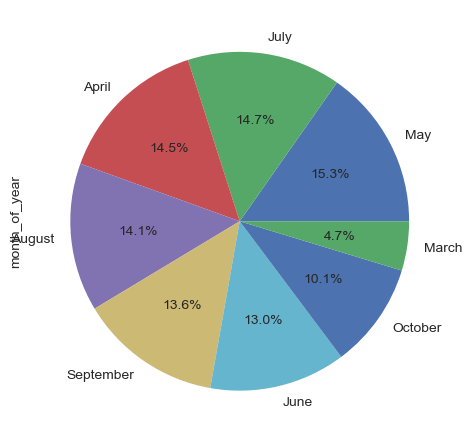

In [24]:
df["month_of_year"].value_counts().plot.pie(autopct='%1.1f%%')

<Axes: ylabel='weekday'>

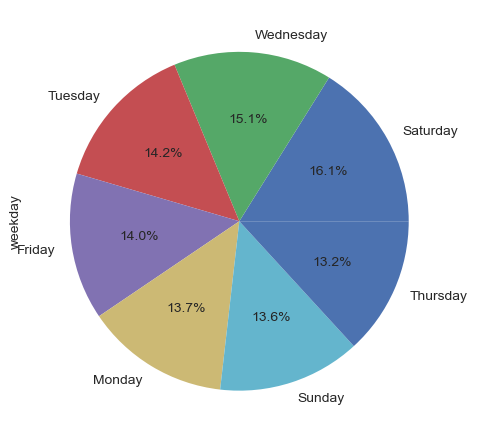

In [112]:
df['weekday'].value_counts().plot.pie(autopct='%1.1f%%')

<Axes: ylabel='product_name_re'>

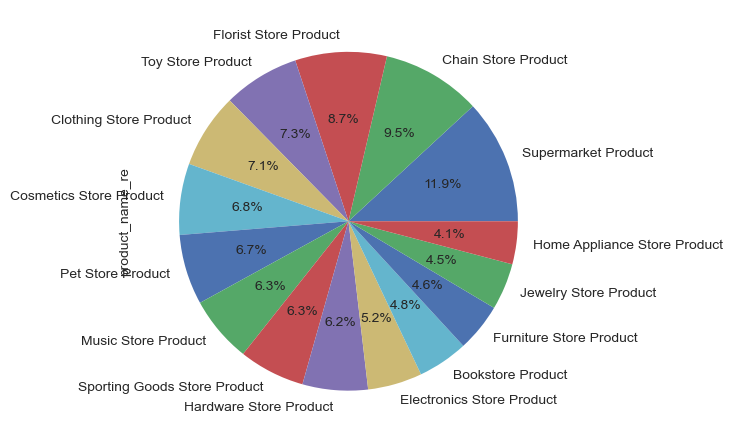

In [113]:
df['product_name_re'].value_counts().plot.pie(autopct='%1.1f%%')

<Axes: ylabel='store'>

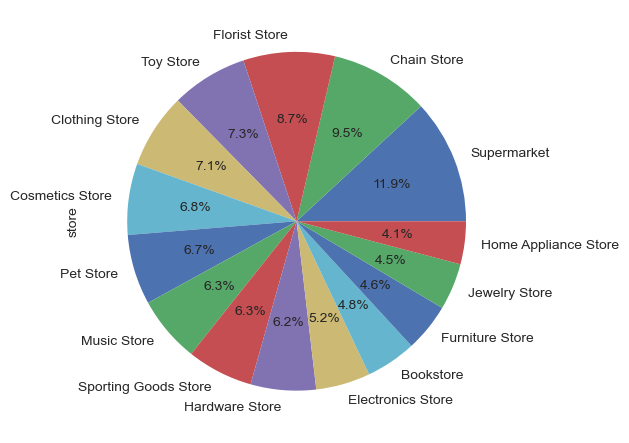

In [114]:
df['store'].value_counts().plot.pie(autopct='%1.1f%%')

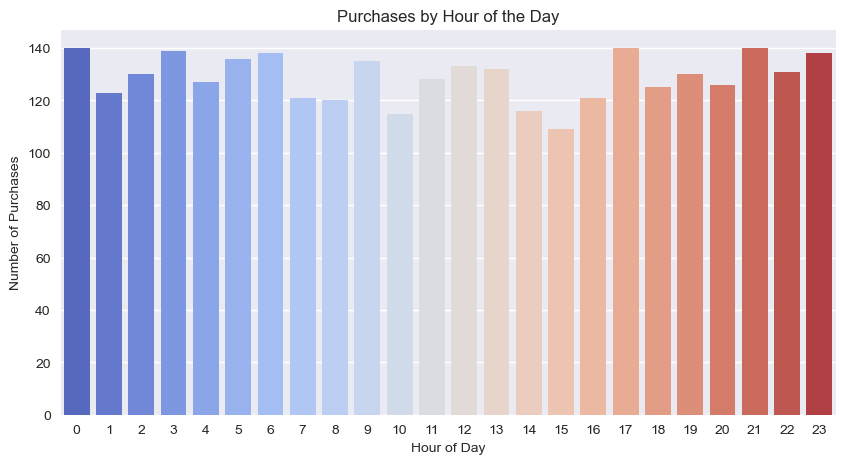

In [31]:
hourly_purchases = df.groupby("hour")["transaction_id"].nunique().reset_index()
hourly_purchases.rename(columns={"transaction_id": "purchase_count"}, inplace=True)

plt.figure(figsize=(10, 5))
sns.barplot(data=hourly_purchases, x="hour", y="purchase_count", palette="coolwarm")
plt.title("Purchases by Hour of the Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Purchases")
plt.show()

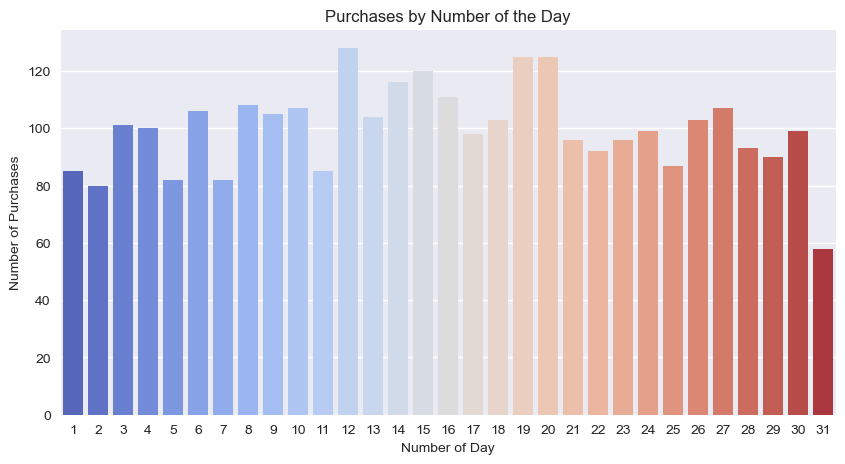

In [32]:
daily_purchases = df.groupby("day")["transaction_id"].nunique().reset_index()
daily_purchases.rename(columns={"transaction_id": "purchase_count"}, inplace=True)

plt.figure(figsize=(10, 5))
sns.barplot(data=daily_purchases, x="day", y="purchase_count", palette="coolwarm")
plt.title("Purchases by Number of the Day")
plt.xlabel("Number of Day")
plt.ylabel("Number of Purchases")
plt.show()

<Axes: ylabel='month_of_year'>

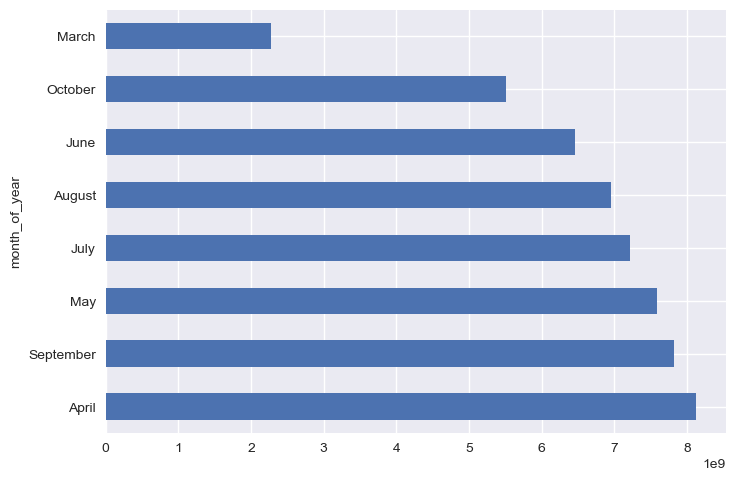

In [66]:
df.groupby('month_of_year')['total_amount'].sum().sort_values(ascending=False).plot.barh()

<Axes: ylabel='product_name_re'>

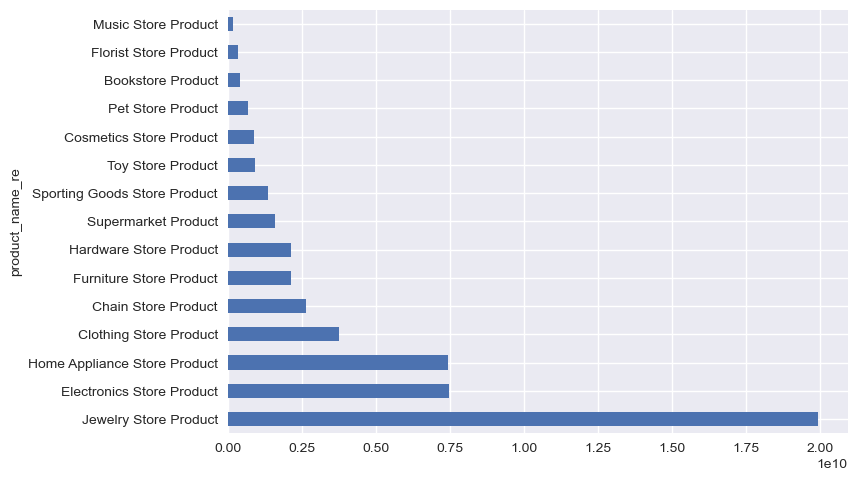

In [67]:
df.groupby('product_name_re')['total_amount'].sum().sort_values(ascending=False).plot.barh()

<Axes: ylabel='store'>

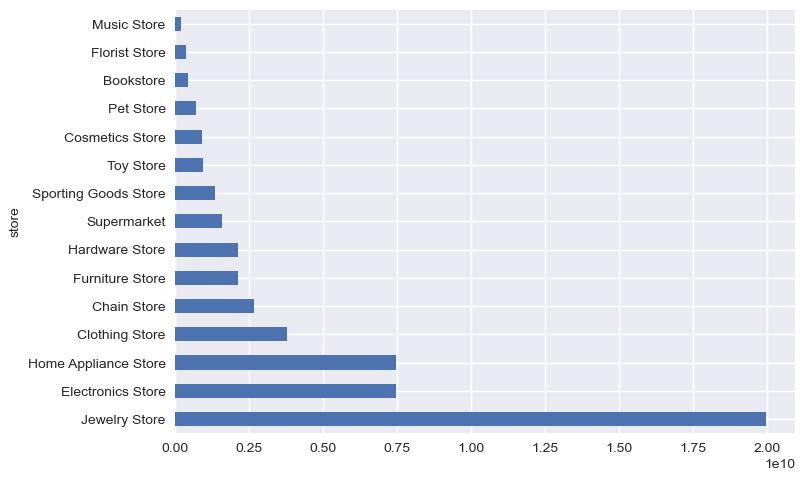

In [68]:
df.groupby('store')['total_amount'].sum().sort_values(ascending=False).plot.barh()

<Axes: ylabel='user_id'>

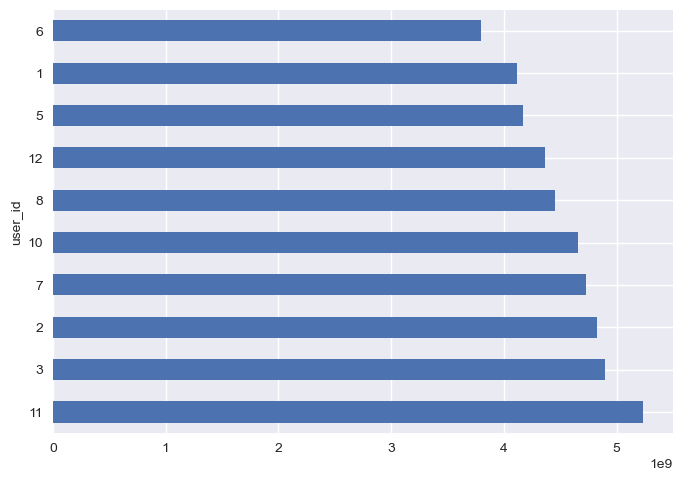

In [69]:
df.groupby('user_id')['total_amount'].sum().sort_values(ascending=False).head(10).plot.barh()

<Axes: ylabel='transaction_date'>

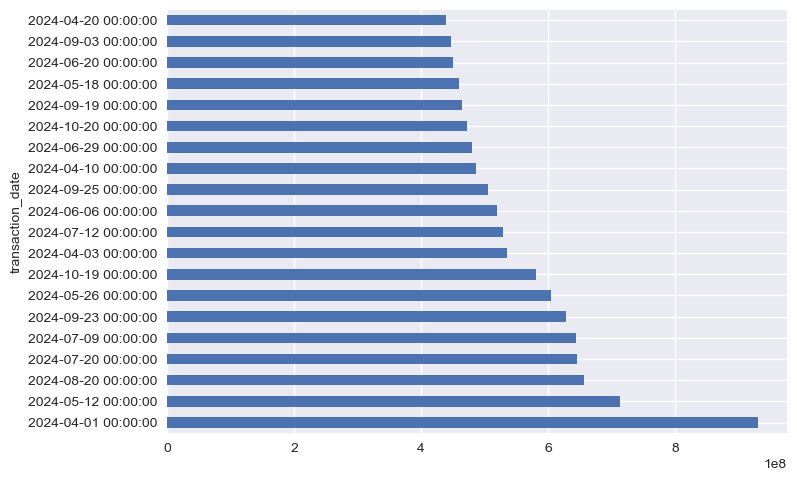

In [42]:
df.groupby('transaction_date')['total_amount'].sum().sort_values(ascending=False).head(20).plot.barh()

<Axes: ylabel='hour'>

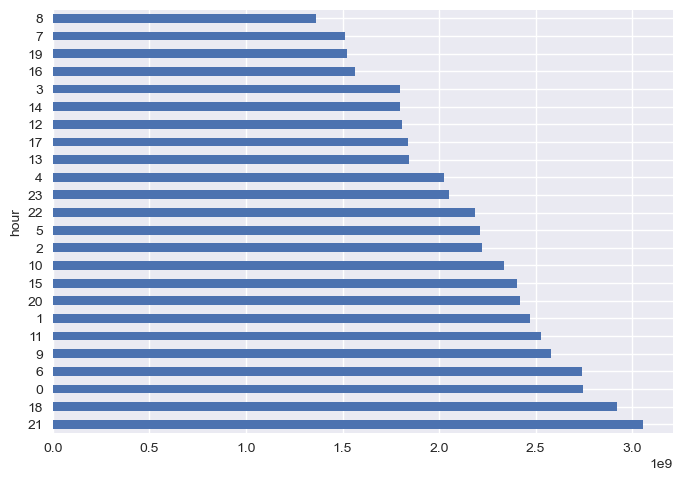

In [43]:
df.groupby('hour')['total_amount'].sum().sort_values(ascending=False).plot.barh()

<Axes: >

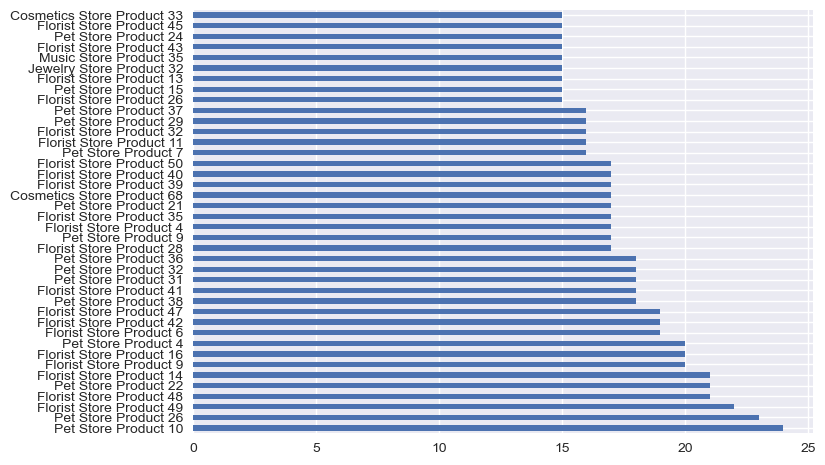

In [50]:
df['product_name'].value_counts().head(40).plot.barh()

<Axes: ylabel='day'>

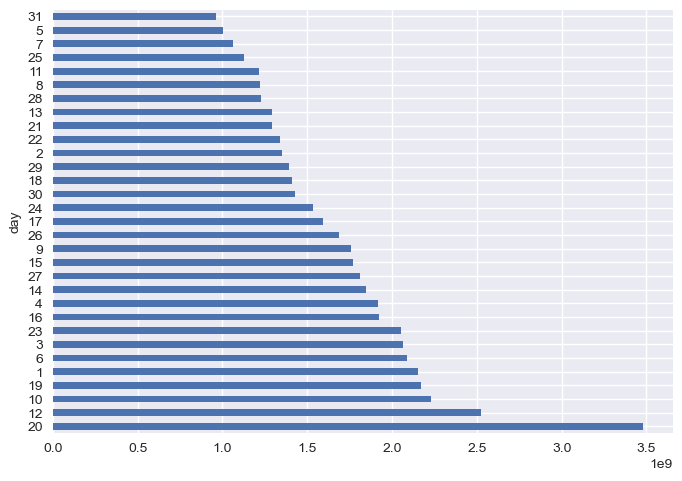

In [45]:
df.groupby('day')['total_amount'].sum().sort_values(ascending=False).plot.barh()

<Axes: ylabel='weekday'>

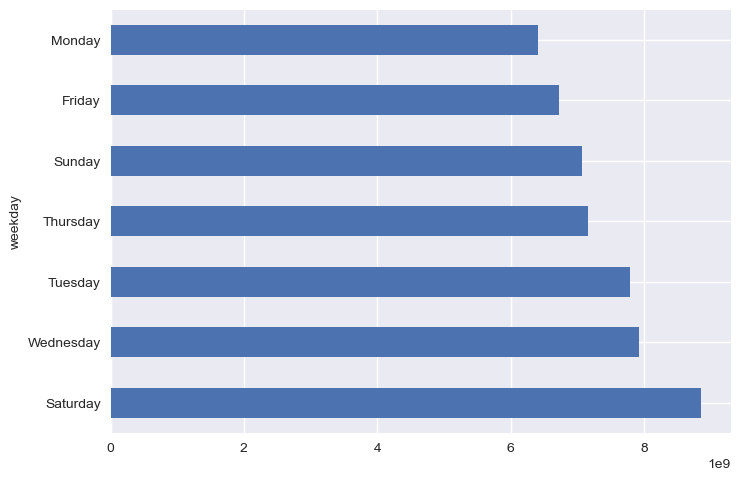

In [75]:
df.groupby('weekday')['total_amount'].sum().sort_values(ascending=False).plot.barh()

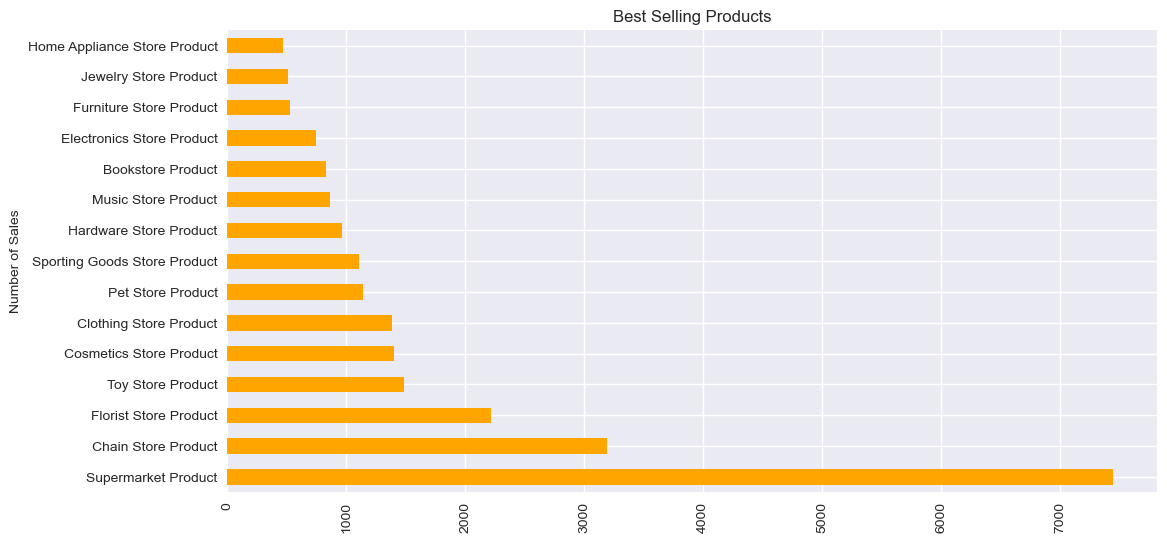

In [47]:
top_products = df.groupby("product_name_re")["quantity"].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
top_products.plot(kind="barh", color="orange")
plt.title("Best Selling Products")
plt.ylabel("Number of Sales")
plt.xticks(rotation=90)
plt.show()

In [59]:
pro=df['total_amount'].sum()

In [60]:
print(f'Total sales of all products : {pro}')

Total sales of all products : 51934516331.19


In [152]:
def skew_df(dff,name):
    dff[f'{name}_reciprocal'] = (1 / (dff[name] + 1)) 
    dff[f'{name}_sqrt'] = np.sqrt(dff[name]) 
    dff[f'{name}_log'] = np.log1p(dff[name])  
    name_df = skew(dff[name]) * 10 
    name_reciprocal = skew(dff[f'{name}_reciprocal'])
    name_sqrt = skew(dff[f'{name}_sqrt'])
    name_log = skew(dff[f'{name}_log'])
    
    return name_df,name_reciprocal,name_sqrt,name_log

In [153]:
def skew_hist(dff,col,skew_name):
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))
    sns.histplot(dff[col], bins=20, color='skyblue', kde=True, ax=axs[0], edgecolor='black')
    axs[0].set_title(f'Distribution of {col}')
    axs[0].set_xlabel(f'{col}')
    axs[0].set_ylabel('Frequency')

    sns.histplot(dff[skew_name], bins=20, color='lightgreen', kde=True, ax=axs[1], edgecolor='black')
    axs[1].set_title(f'Distribution of {skew_name}')
    axs[1].set_xlabel('Total Log')
    axs[1].set_ylabel('Frequency')

    plt.tight_layout()

    plt.show()

In [154]:
super_ma=df[df['product_name_re']=='Supermarket Product']

In [155]:
super_amount_df,super_amount_reciprocal,super_amount_sqrt,super_amount_log = skew_df(super_ma,'total_amount')

In [158]:
print('Skewness of original campaign:', super_amount_df)

print('Skewness after reciprocal transformation:', super_amount_reciprocal)

print('Skewness after sqrt transformation:', super_amount_sqrt)

print('Skewness after log transformation:', super_amount_log)

Skewness of original campaign: 5.732896645230228
Skewness after reciprocal transformation: 2.5801579336360505
Skewness after sqrt transformation: 0.04701404234449556
Skewness after log transformation: -0.6169275596282532


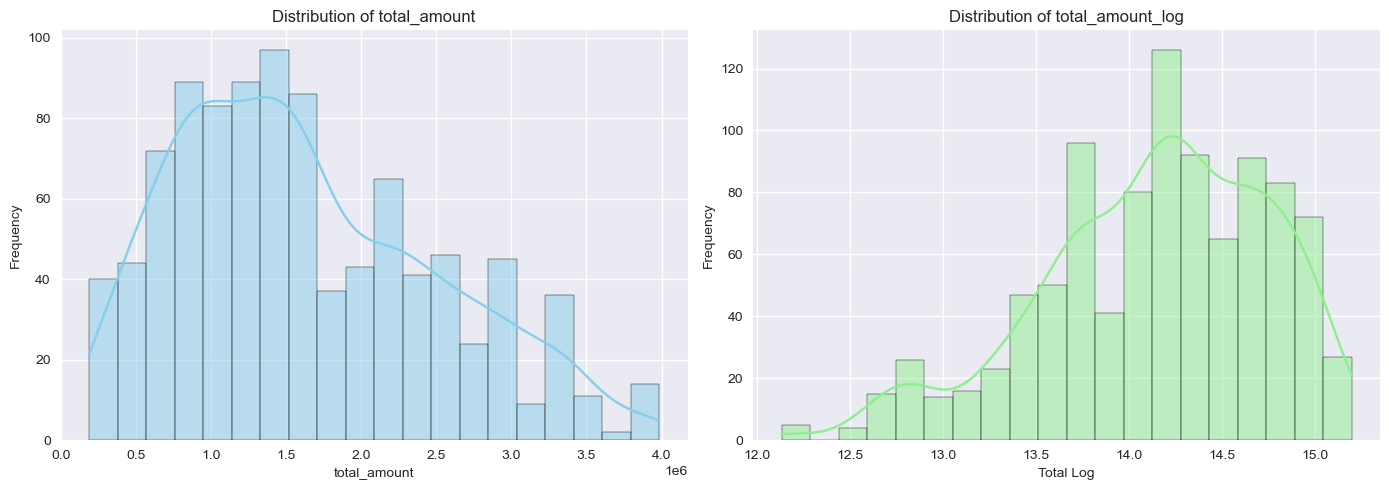

In [159]:
skew_hist(super_ma,'total_amount','total_amount_log')

In [129]:
chain_store=df[df['product_name_re']=='Chain Store Product']

In [130]:
chain_amount_df,chain_amount_reciprocal,chain_amount_sqrt,chain_amount_log = skew_df(chain_store,'total_amount')

In [161]:
print('Skewness of original campaign:', chain_amount_df)

print('Skewness after reciprocal transformation:', chain_amount_reciprocal)

print('Skewness after sqrt transformation:', chain_amount_sqrt)

print('Skewness after log transformation:', chain_amount_log)

Skewness of original campaign: 0.6776417961608107
Skewness after reciprocal transformation: 5.355720357405778
Skewness after sqrt transformation: 0.09186294088621395
Skewness after log transformation: -0.6458200226685086


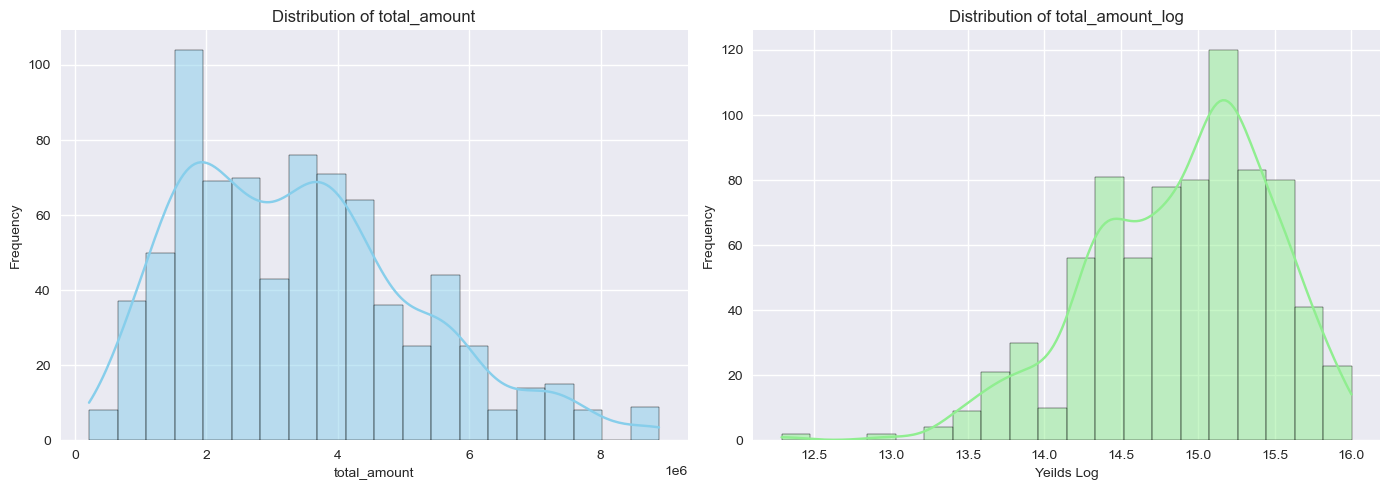

In [132]:
skew_hist(chain_store,'total_amount','total_amount_log')

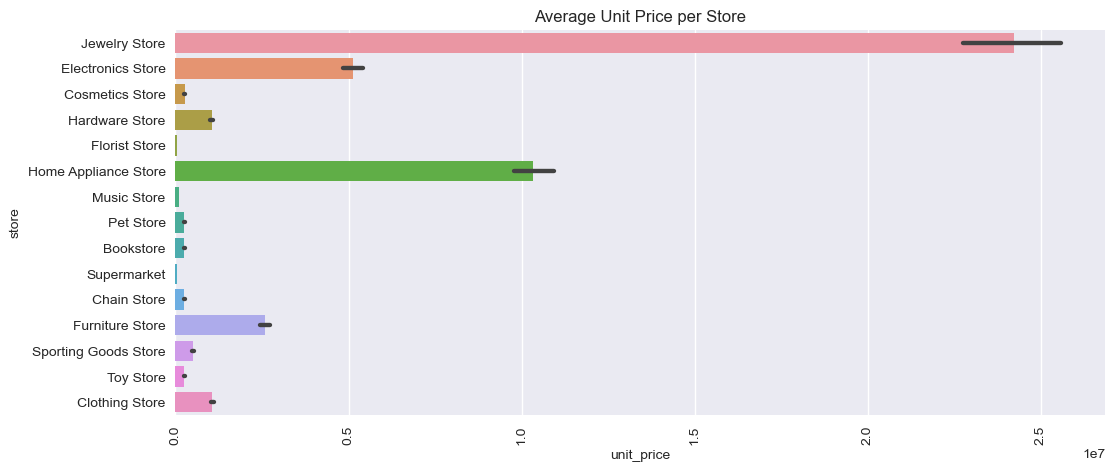

In [252]:
plt.figure(figsize=(12, 5))
sns.barplot(x=df["unit_price"], y=df["store"])
plt.xticks(rotation=90)
plt.title("Average Unit Price per Store")
plt.show()


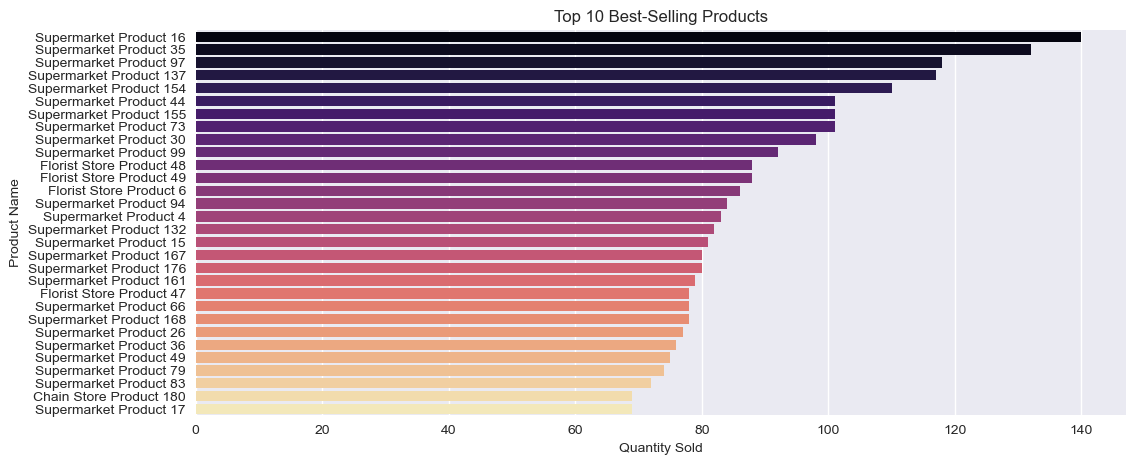

In [248]:
top_products = df.groupby("product_name")["quantity"].sum().reset_index()
top_products = top_products.sort_values(by="quantity", ascending=False).head(30)

plt.figure(figsize=(12, 5))
sns.barplot(data=top_products, x="quantity", y="product_name", palette="magma")
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Quantity Sold")
plt.ylabel("Product Name")
plt.show()

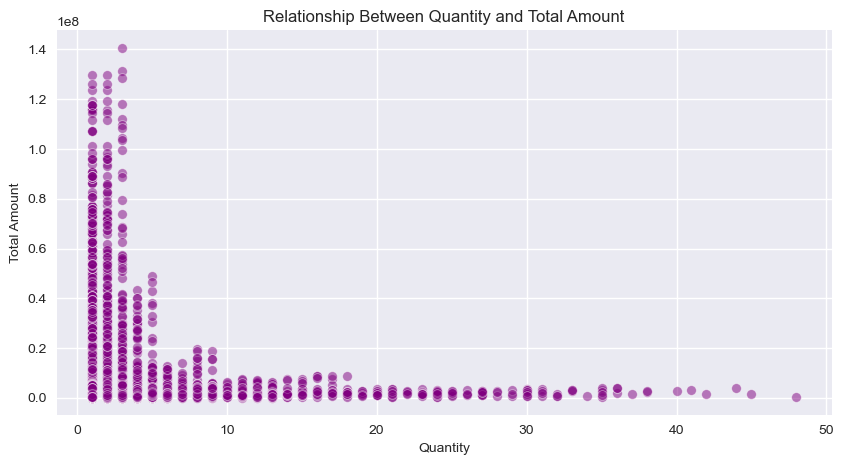

In [249]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x="quantity", y="total_amount", alpha=0.5, color="purple")
plt.title("Relationship Between Quantity and Total Amount")
plt.xlabel("Quantity")
plt.ylabel("Total Amount")
plt.show()

<Axes: >

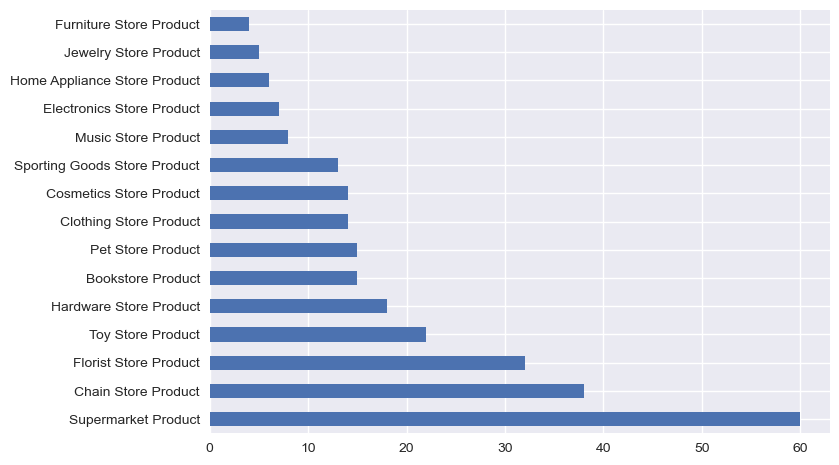

In [250]:
df["discount_amount"] = df["total_price"] - (df["unit_price"] * df["quantity"])
df[df['discount_amount']>0]['product_name_re'].value_counts().plot.barh()

# Grouping

In [240]:
customer_spending = df.groupby('user_id')['total_amount'].sum().reset_index()

In [243]:
customer_spending["log_total_amount"] = np.log1p(customer_spending["total_amount"])
q1 = customer_spending["log_total_amount"].quantile(0.33)
q2 = customer_spending["log_total_amount"].quantile(0.66)
q3 = customer_spending["log_total_amount"].max()
bins = [0, q1, q2, q3]
labels = ["Low Spender", "Regular Spender", "VIP"]
customer_spending["category"] = pd.cut(customer_spending["log_total_amount"], bins=bins, labels=labels)

In [242]:
customer_spending

,user_id,total_amount,log_total_amount,category
0,1,4.114019e+09,22.137666,Low Spender
1,2,4.824619e+09,22.296998,VIP
2,3,4.897524e+09,22.311996,VIP
3,4,3.333319e+09,21.927234,Low Spender
4,5,4.167616e+09,22.150610,Regular Spender
5,6,3.797353e+09,22.057570,Low Spender
6,7,4.731971e+09,22.277608,VIP
7,8,4.452082e+09,22.216638,Regular Spender
8,9,3.356738e+09,21.934235,Low Spender
9,10,4.654176e+09,22.261031,Regular Spender


<Axes: ylabel='category'>

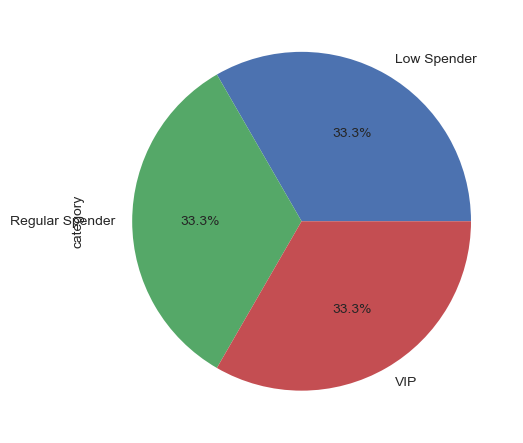

In [254]:
customer_spending['category'].value_counts().plot.pie(autopct='%1.1f%%')

In [245]:
df["log_total_amount"] = np.log1p(df["total_amount"])
q1 = df["log_total_amount"].quantile(0.33)
q2 = df["log_total_amount"].quantile(0.66)
q3 = df["log_total_amount"].max()
bins = [0, q1, q2, q3]
labels = ["Low Spender", "Regular Spender", "VIP"]
df["category"] = pd.cut(df["log_total_amount"], bins=bins, labels=labels)

<Axes: ylabel='category'>

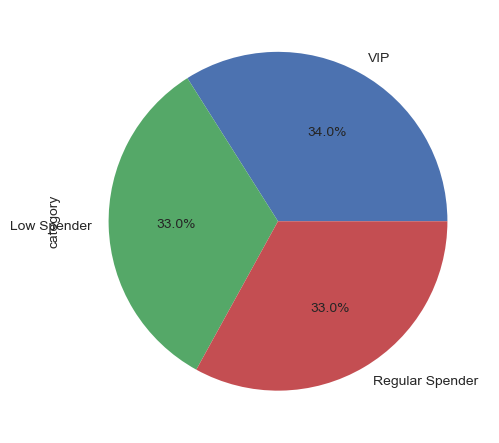

In [247]:
df['category'].value_counts().plot.pie(autopct='%1.1f%%')

In [425]:
def time_of_day(hour):
    if 6 <= hour < 12:
        return "morning"
    elif 12 <= hour < 18:
        return "noon"
    elif 18 <= hour < 24:
        return "evening"
    else:
        return "night"
df["time_category"] = df["transaction_time"].apply(time_of_day)
time_pattern = df["time_category"].value_counts()

<Axes: >

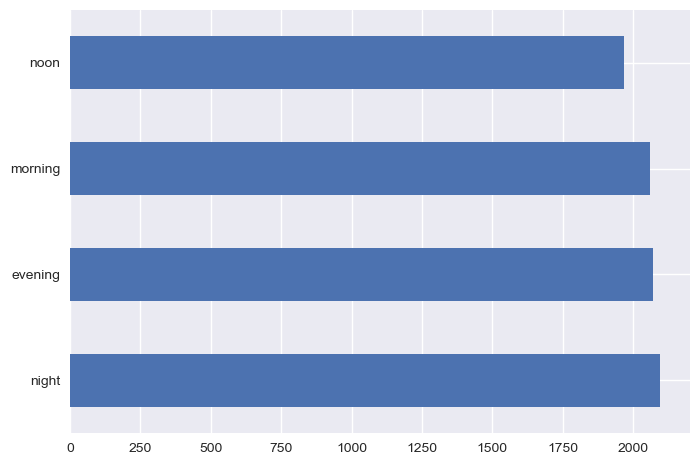

In [426]:
time_pattern.plot.barh()

In [258]:
from itertools import combinations
from collections import Counter

In [259]:
user1=df[df['user_id']==1]

In [260]:
transactions = user1.groupby("transaction_id")["product_name"].apply(list)

product_combinations = Counter()
for items in transactions:
    product_combinations.update(combinations(sorted(items), 2))

product_combinations.most_common(10)

[(('Florist Store Product 40', 'Florist Store Product 41'), 2),
 (('Florist Store Product 16', 'Florist Store Product 47'), 2),
 (('Jewelry Store Product 2', 'Jewelry Store Product 48'), 2),
 (('Supermarket Product 140', 'Supermarket Product 55'), 2),
 (('Pet Store Product 22', 'Pet Store Product 36'), 2),
 (('Sporting Goods Store Product 100', 'Sporting Goods Store Product 106'), 2),
 (('Sporting Goods Store Product 100', 'Sporting Goods Store Product 74'), 2),
 (('Pet Store Product 20', 'Pet Store Product 7'), 2),
 (('Sporting Goods Store Product 44', 'Sporting Goods Store Product 76'), 2),
 (('Pet Store Product 21', 'Pet Store Product 25'), 2)]

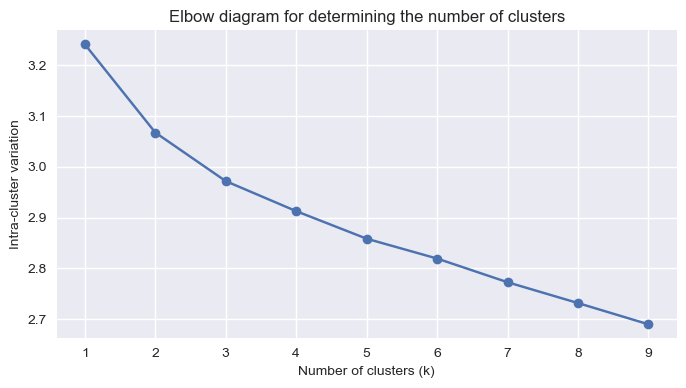

In [434]:
from scipy.spatial.distance import cdist

scaler = StandardScaler()
product_scaled = scaler.fit_transform(customer_product.T)

distortions = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(product_scaled)
    distortions.append(sum(np.min(cdist(product_scaled, kmeans.cluster_centers_, 'euclidean'), axis=1)) / product_scaled.shape[0])

plt.figure(figsize=(8, 4))
plt.plot(range(1, 10), distortions, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Intra-cluster variation")
plt.title("Elbow diagram for determining the number of clusters")
plt.show()

In [19]:
product_variety = df.groupby("user_id")["product_name"].nunique().reset_index()

q33 = product_variety["product_name"].quantile(0.33) 
q66 = product_variety["product_name"].quantile(0.66)  
max_value = product_variety["product_name"].max()  

bins = [0, q33, q66, max_value]
labels = ["low-diversity", "medium-diversity", "high-diversity"]
product_variety["category"] = pd.cut(product_variety["product_name"], bins=bins, labels=labels, include_lowest=True)

product_variety

,user_id,product_name,category
0,1,506,low-diversity
1,2,528,medium-diversity
2,3,556,high-diversity
3,4,550,high-diversity
4,5,477,low-diversity
5,6,507,medium-diversity
6,7,503,low-diversity
7,8,505,low-diversity
8,9,534,medium-diversity
9,10,537,high-diversity


In [468]:
weekday_behavior = df[["user_id", "weekday","transaction_id"]]
hour_behavior = df[["user_id", "transaction_time","transaction_id"]]

In [469]:
weekend_mapping = {
    "Thursday": "Weekend",
    "Friday": "Weekend",
    "Saturday": "Start of Week"
}


weekday_behavior["category"] = weekday_behavior["weekday"].map(weekend_mapping).fillna("Midweek")

In [470]:
weekday_behavior

,user_id,weekday,transaction_id,category
0,1,Wednesday,1,Midweek
1,1,Thursday,2,Weekend
2,1,Friday,3,Weekend
3,1,Friday,3,Weekend
4,1,Saturday,4,Start of Week
...,...,...,...,...
8187,12,Wednesday,306,Midweek
8188,12,Friday,307,Weekend
8189,12,Friday,307,Weekend
8190,12,Friday,308,Weekend


In [473]:
hour_behavior["category"] = np.where(hour_behavior["transaction_time"].between(17, 19), 
                                     "Peak Hours", 
                                     "Off-Peak Hours")

In [474]:
hour_behavior

,user_id,transaction_time,transaction_id,category
0,1,23,1,Off-Peak Hours
1,1,16,2,Off-Peak Hours
2,1,7,3,Off-Peak Hours
3,1,7,3,Off-Peak Hours
4,1,15,4,Off-Peak Hours
...,...,...,...,...
8187,12,13,306,Off-Peak Hours
8188,12,8,307,Off-Peak Hours
8189,12,8,307,Off-Peak Hours
8190,12,22,308,Off-Peak Hours


In [80]:
features = df.groupby("user_id").agg(
    total_spent=("total_amount", "sum"),
    transaction_count=("transaction_id", "count"),
    product_variety=("product_name", "nunique")
).reset_index()

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features[["total_spent", "transaction_count", "product_variety"]])

kmeans = KMeans(n_clusters=3, random_state=0)
features["Cluster"] = kmeans.fit_predict(features_scaled)

features


,user_id,total_spent,transaction_count,product_variety,Cluster
0,1,4.114019e+09,661,506,0
1,2,4.824619e+09,673,528,0
2,3,4.897524e+09,708,556,1
3,4,3.333319e+09,717,550,2
4,5,4.167616e+09,624,477,0
5,6,3.797353e+09,636,507,0
6,7,4.731971e+09,660,503,0
7,8,4.452082e+09,678,505,0
8,9,3.356738e+09,689,534,2
9,10,4.654176e+09,725,537,1


In [54]:
latest_date = df["transaction_date"].max()

rfm = df.groupby("user_id").agg(
    Recency=("transaction_date", lambda x: (latest_date - x.max()).days),  
    Frequency=("transaction_id", "count"),  
    Monetary=("total_amount", "sum")  
).reset_index()

In [73]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[["Recency", "Frequency", "Monetary"]])

kmeans = KMeans(n_clusters=3, random_state=0)
rfm["Cluster"] = kmeans.fit_predict(rfm_scaled)

In [74]:
rfm

,user_id,Recency,Frequency,Monetary,Cluster
0,1,0,661,4.114019e+09,0
1,2,0,673,4.824619e+09,0
2,3,0,708,4.897524e+09,2
3,4,0,717,3.333319e+09,1
4,5,0,624,4.167616e+09,0
5,6,0,636,3.797353e+09,0
6,7,0,660,4.731971e+09,0
7,8,0,678,4.452082e+09,0
8,9,0,689,3.356738e+09,1
9,10,0,725,4.654176e+09,2


In [75]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

silhouette = silhouette_score(rfm_scaled, rfm["Cluster"])
print(f"Silhouette Score: {silhouette:.4f}")

davies_bouldin = davies_bouldin_score(rfm_scaled, rfm["Cluster"])
print(f"Davies-Bouldin Score: {davies_bouldin:.4f}")

Silhouette Score: 0.4913
Davies-Bouldin Score: 0.5725
